In [1]:
from dataloader import Color_Dataloader
import torch
from eval import eval
from configs import TAGS
import warnings
warnings.filterwarnings("ignore")

In [2]:
DIR_DATASET = 'dataset'
BATCH_SIZE = 32
PATH_MODEL = 'weights/mobilenet_11classes.pt'
DEVICE = 'cpu'

In [3]:
model_simple = torch.load(PATH_MODEL, map_location = 'cpu')

In [4]:
train_loader, test_loader = Color_Dataloader(
    dir_dataset=DIR_DATASET,
    batch_size=BATCH_SIZE
)

In [5]:
_ = eval(model = model_simple, 
    dataloader=train_loader, 
    device = DEVICE)


KeyboardInterrupt



In [6]:
predics, labels = eval(model = model_simple, 
    dataloader=test_loader, 
    device = DEVICE)

              precision    recall  f1-score   support

       black       0.82      0.74      0.78       456
        blue       0.96      0.90      0.93       444
       brown       0.59      0.77      0.67       170
       green       0.90      0.90      0.90       155
        pink       0.95      0.90      0.92       428
         red       0.96      0.96      0.96       402
      silver       0.56      0.43      0.49       219
       white       0.69      0.86      0.76       314
      yellow       0.95      0.97      0.96       304

    accuracy                           0.85      2892
   macro avg       0.82      0.83      0.82      2892
weighted avg       0.85      0.85      0.84      2892



In [7]:
from sklearn.metrics import confusion_matrix

In [8]:
import numpy as np
cm = confusion_matrix(labels, predics)
cm = cm/cm.astype(np.float).sum(axis=1)

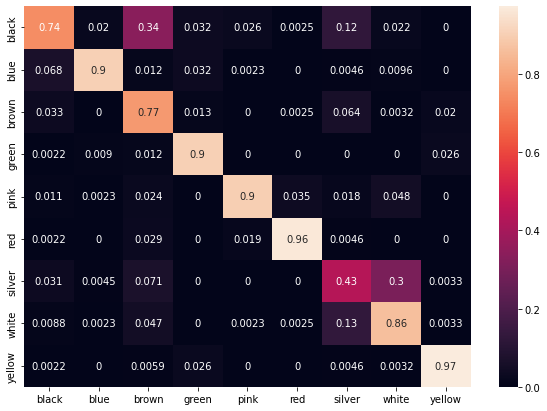

In [9]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, index = [i for i in TAGS],
                  columns = [i for i in TAGS])
plt.figure(figsize = (10,7))
_ = sn.heatmap(df_cm, annot=True)